In [ ]:
# 安装第三方库
!pip install scikit-learn pandas matplotlib numpy

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 读取并展示数据
data = pd.read_csv('./data/simple_example.csv')
data

,x,y
0,10,7.70
1,10,9.87
2,11,11.18
3,12,10.43
4,13,12.36
5,14,14.15
6,15,15.73
7,16,16.40
8,17,18.86
9,18,16.13


In [4]:
features = ['x']
labels = ['y']
# 划分训练集和测试集
train_data = data[:15]
test_data = data[15:]

In [5]:
# 创建一个线性回归模型
model = linear_model.LinearRegression()
# 训练模型，估计模型参数
model.fit(train_data[features], train_data[labels])

LinearRegression()

In [6]:
# 均方差(Mean Squared Error)，均方差越小越好
error = model.predict(test_data[features]) - test_data[labels]
mse = np.mean(error.values ** 2)
# 决定系数(Coefficient of Determination)，决定系数越接近1越好
score = model.score(test_data[features], test_data[labels])
mse, score

(0.7261890496067369, 0.8284302073217281)

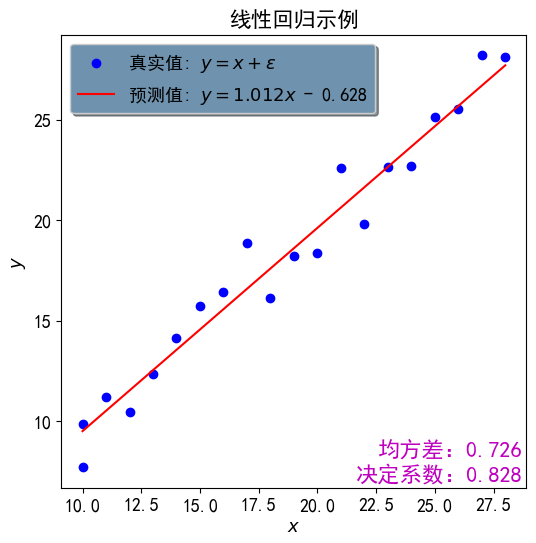

In [7]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=100)
# 在图形框里只画一幅图
ax = fig.add_subplot(111)
ax.set_title('线性回归示例')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# 画点图，用蓝色圆点表示原始数据
ax.scatter(data[features], data[labels], color='b', label='真实值: $y = x + \epsilon$')
# 根据截距的正负，打印不同的标签
if model.intercept_ > 0:
    label = f'预测值: $y = {model.coef_.item():.3f}x$ + {model.intercept_.item():.3f}'
else:
    label = f'预测值: $y = {model.coef_.item():.3f}x$ - {abs(model.intercept_.item()):.3f}'
# 画线图，用红色线条表示模型结果
ax.plot(data[features], model.predict(data[features]), color='r', label=label)
# 设置图例的样式
legend = plt.legend(shadow=True)
legend.get_frame().set_facecolor('#6F93AE')
# 显示均方差和决定系数
ax.text(0.99, 0.01, f'均方差：{mse:.3f}\n决定系数：{score:.3f}',
        style='italic', verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes, color='m', fontsize=16)
plt.savefig('linear_ml.png', dpi=200)
plt.show()